In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
from scipy.stats import multivariate_normal
import scipy.stats as stats
import pandas as pd

# Data generate

In [22]:
# Shuffle randomly
import random

def shuffle_n_elements(arr, ratio):
    n = int(ratio*len(arr))
    # Get a copy of the array
    shuffled_arr = arr.copy()
    
    ind = [i for i in range(len(arr))]
    picked = random.sample(ind,n)
    shuffle = picked.copy()
    random.shuffle(shuffle)
    # Shuffle the first n elements
    for i in range(len(picked)):
        shuffled_arr[picked[i]] = arr[shuffle[i]]
    
    return shuffled_arr

In [23]:
def data_generate(arr, days, shift = [0,0], relax = [25,25], shuffle_rate = [0.05,0.05]):
    
    '''
    Generate data based on an array
    arr : array
    days : number of days
    shift : distribution shift range
    relax : std of partition
    shuffle_rate : the rate of randomly shuffled data
    '''
    min_range = 300
    max_range = 850
    samples = []

    # Generate y values based on x to achieve the desired correlation   
    for i in range(days):
        partition = np.random.normal(loc=random.uniform(shift[0],shift[1]), scale=random.uniform(relax[0],relax[1]), size=size)
        y = shuffle_n_elements(arr, random.uniform(shuffle_rate[0],shuffle_rate[1])) + partition
        y = np.clip(y, min_range, max_range)
        y = y.astype(int)
        samples.append(y)
        
    samples = np.array(samples)
    
    return samples

In [24]:
def dataset_generate(size, days, false_rate, shift_range, relax_range, shuffle_range):
    '''
    size : number of observers
    days : number of days
    false_rate : rate of false cases
    shift_range : distribution shift range (E.g:[[1,2],[3,4]] ([1,2]: true range, [3,4]: false range))
    relax_range : std range of partition (E.g:[[1,2],[3,4]] ([1,2]: true range, [3,4]: false range))
    shuffle_range : the range of randomly shuffled true data (E.g:[[1,2],[3,4]] ([1,2]: true range, [3,4]: false range))
    '''
    
    mean_x = 600
    std_x = 150
    min_range = 300
    max_range = 850
    # Generate x values
    x = np.random.normal(loc=mean_x, scale=std_x, size=size)
    # Calculate the percentiles corresponding to the minimum and maximum values
    min_percentile = stats.norm.cdf(min_range, loc=mean_x, scale=std_x)
    max_percentile = stats.norm.cdf(max_range, loc=mean_x, scale=std_x)

    # Generate random values from a uniform distribution within the desired percentile range
    uniform_values = np.random.uniform(low=min_percentile, high=max_percentile, size=size)
    
    # Transform the uniform values back to the normal distribution using the inverse CDF
    x = stats.norm.ppf(uniform_values, loc=mean_x, scale=std_x)
    x = np.clip(x, min_range, max_range)
    x = x.astype(int)
    
    false_days = int(false_rate*days)
    true_days = days-false_days
    dataset = []
    
    #true generate
    true = data_generate(x, true_days, shift_range[0], relax_range[0], shuffle_range[0])
    true = np.column_stack((true, np.zeros(true_days)))
    
    #false generate
    false = data_generate(x, false_days, shift_range[1], relax_range[1], shuffle_range[1])
    false = np.column_stack((false, np.ones(false_days)))
    
    dataset.extend(true)
    dataset.extend(false)
    dataset.append(np.append(x,0))
    random.shuffle(dataset)
    dataset = np.array(dataset)
    dataset = pd.DataFrame(dataset)
    dataset = dataset.rename(columns={dataset.columns[-1]: 'class'})
    
    return dataset

In [25]:
size = 5000
days = 150
false_rate = 0.15
shift_range = [[0,0],[0,0]]
relax_range = [[25,25],[25,25]]
shuffle_range = [[0,0.05],[0.1, 0.2]]

In [26]:
df = dataset_generate(size, days, false_rate, shift_range, relax_range, shuffle_range)

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,class
0,400.0,771.0,320.0,599.0,601.0,537.0,631.0,455.0,699.0,696.0,...,407.0,547.0,644.0,778.0,719.0,680.0,447.0,471.0,591.0,0.0
1,452.0,830.0,333.0,587.0,621.0,618.0,587.0,418.0,657.0,678.0,...,378.0,528.0,648.0,788.0,718.0,711.0,849.0,458.0,583.0,0.0
2,327.0,773.0,355.0,541.0,648.0,602.0,839.0,528.0,654.0,719.0,...,648.0,535.0,716.0,762.0,640.0,690.0,784.0,529.0,531.0,1.0
3,491.0,823.0,306.0,545.0,598.0,609.0,649.0,486.0,626.0,707.0,...,361.0,535.0,629.0,787.0,721.0,739.0,798.0,521.0,628.0,0.0
4,461.0,796.0,620.0,609.0,645.0,606.0,629.0,421.0,656.0,790.0,...,507.0,569.0,629.0,716.0,713.0,400.0,795.0,508.0,614.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,458.0,791.0,325.0,576.0,607.0,584.0,614.0,459.0,646.0,692.0,...,398.0,528.0,639.0,771.0,725.0,690.0,813.0,493.0,575.0,0.0
147,463.0,810.0,324.0,588.0,596.0,551.0,601.0,469.0,633.0,657.0,...,362.0,506.0,607.0,792.0,730.0,711.0,838.0,481.0,563.0,0.0
148,478.0,825.0,376.0,566.0,600.0,619.0,674.0,444.0,660.0,715.0,...,366.0,539.0,556.0,740.0,704.0,685.0,809.0,487.0,530.0,0.0
149,440.0,754.0,323.0,652.0,608.0,614.0,609.0,471.0,824.0,688.0,...,406.0,548.0,628.0,768.0,718.0,733.0,829.0,459.0,603.0,0.0


In [28]:
df[df['class'] == 1]

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,class
2,327.0,773.0,355.0,541.0,648.0,602.0,839.0,528.0,654.0,719.0,...,648.0,535.0,716.0,762.0,640.0,690.0,784.0,529.0,531.0,1.0
4,461.0,796.0,620.0,609.0,645.0,606.0,629.0,421.0,656.0,790.0,...,507.0,569.0,629.0,716.0,713.0,400.0,795.0,508.0,614.0,1.0
7,498.0,819.0,341.0,588.0,596.0,611.0,656.0,438.0,584.0,697.0,...,410.0,538.0,652.0,787.0,733.0,667.0,803.0,439.0,560.0,1.0
10,411.0,798.0,344.0,672.0,850.0,608.0,607.0,466.0,626.0,672.0,...,428.0,562.0,794.0,794.0,300.0,691.0,526.0,516.0,582.0,1.0
12,494.0,460.0,325.0,538.0,612.0,528.0,663.0,462.0,644.0,712.0,...,411.0,770.0,495.0,774.0,680.0,657.0,788.0,471.0,599.0,1.0
14,452.0,773.0,464.0,586.0,628.0,549.0,616.0,508.0,661.0,675.0,...,375.0,525.0,634.0,392.0,737.0,329.0,811.0,448.0,622.0,1.0
23,495.0,817.0,300.0,563.0,578.0,574.0,589.0,458.0,645.0,456.0,...,396.0,515.0,642.0,752.0,745.0,691.0,775.0,517.0,583.0,1.0
37,438.0,792.0,300.0,602.0,614.0,564.0,577.0,432.0,627.0,737.0,...,395.0,516.0,655.0,603.0,739.0,691.0,834.0,494.0,607.0,1.0
47,504.0,787.0,331.0,550.0,612.0,583.0,596.0,423.0,663.0,728.0,...,369.0,588.0,583.0,752.0,738.0,711.0,824.0,463.0,585.0,1.0
53,731.0,742.0,362.0,821.0,564.0,605.0,650.0,444.0,640.0,679.0,...,381.0,500.0,499.0,775.0,575.0,685.0,498.0,594.0,583.0,1.0


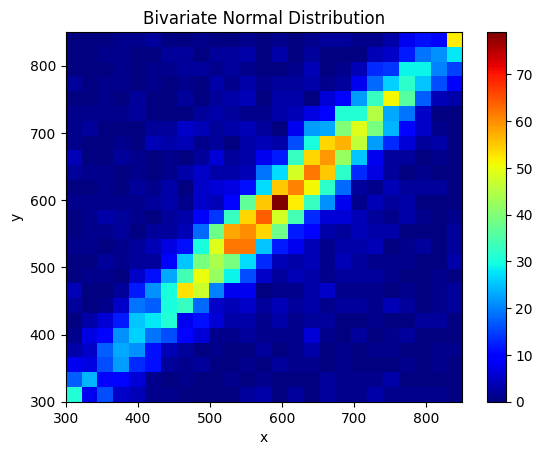

In [29]:
# Plot the heatmap of the bivariate normal distribution
plt.hist2d(df[df.columns[:-1]].loc[13], df[df.columns[:-1]].loc[14], bins=25, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bivariate Normal Distribution')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17900\1233353080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[:-1]].loc[137])
C:\Users\Admin\AppData\Local\Temp\ipykernel_17900\1233353080.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[:-1]].loc[138])


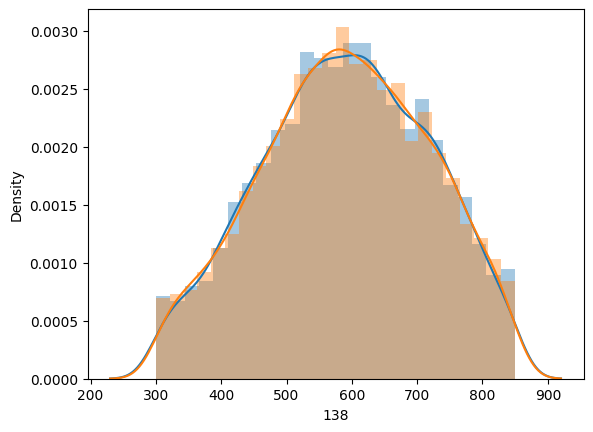

In [30]:
sns.distplot(df[df.columns[:-1]].loc[137])
sns.distplot(df[df.columns[:-1]].loc[138])
plt.show()

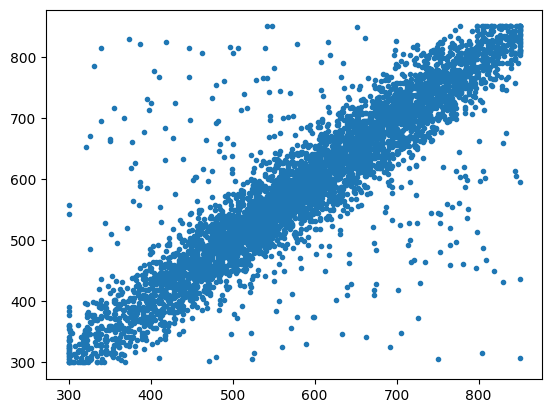

In [31]:
plt.plot(df[df.columns[:-1]].loc[137], df[df.columns[:-1]].loc[138],'.')
plt.show()

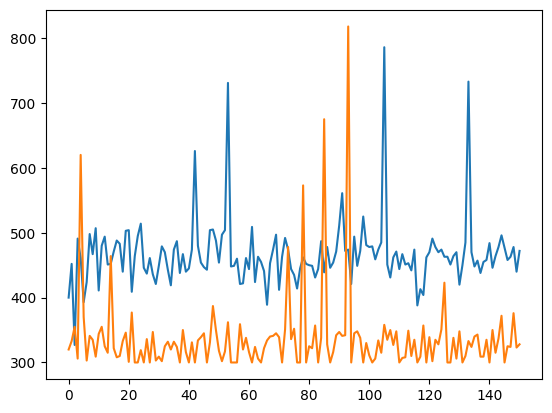

In [32]:
plt.plot(df[df.columns[:-1]][0])
plt.plot(df[df.columns[:-1]][2])
plt.show()

In [33]:
#df.to_csv('Sample_data/5000_150_0.2.csv')

In [34]:
a = [1,2,3]
a = np.array(a)
np.append(a,0)

array([1, 2, 3, 0])

In [35]:
df[df.columns[:-1]].loc[1].max()

850.0